<a href="https://colab.research.google.com/github/holiday-scott/exploring_ebay_car_sales_data/blob/main/eBay_Auto_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# eBay Auto Sales
This analysis will make use of **Pandas**. 

## Aims
- Clean a larger, more complex dataset using Pandas.
- Analyse and visualise the dataset.

## Dataset
Used cars scraed from eBay Kleinanzeigen, a classifieds section of German eBay.
 
### Data Dictionary
- **dateCrawled** - When this ad was first crawled. All field-values are taken from this date.
- **name** - Name of the car.
- **seller** - Whether the seller is private or a dealer.
- **offerType** - The type of listing
- **price** - The price on the ad to sell the car.
- **abtest** - Whether the listing is included in an A/B test.
- **vehicleType** - The vehicle Type.
- **yearOfRegistration** - The year in which the car was first registered.
- **gearbox** - The transmission type.
- **powerPS** - The power of the car in PS.
- **model** - The car model name.
- **kilometer** - How many kilometers the car has driven.
- **monthOfRegistration** - The month in which the car was first registered.
- **fuelType** - What type of fuel the car uses.
- **brand** - The brand of the car.
- **notRepairedDamage** - If the car has a damage which is not yet repaired.
- **dateCreated** - The date on which the eBay listing was created.
- **nrOfPictures** - The number of pictures in the ad.
- **postalCode** - The postal code for the location of the vehicle.
- **lastSeenOnline** - When the crawler saw this ad last online.


# Read Dataset & Import Libraries

In [3]:
# Mount Google.
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)
#drive.flush_and_unmount()

# Find out where the data is.
!ls "gdrive/MyDrive/Colab Notebooks/gp3_autos/"


Mounted at /content/gdrive
 autos.csv  'eBay Auto Sales.ipynb'


In [4]:
import pandas as pd
import numpy as np

autos = pd.read_csv('gdrive/MyDrive/Colab Notebooks/gp3_autos/autos.csv', encoding="Latin-1")


# DataFrame Details

## Observations

- Column headings are inconsistent and messy.
- Dtype is not correct for many series.
- The dataset is in German. Not a problem, per se.
- Some columns are better than others...
  - "brand" is consistent and there are no null values.
  - "vehicleType" is categorical and has "andere" (others).
  - There are a small number of "wanted" ads which could be removed as they are not consistent with the rest of the dataset.




In [ ]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-nu

In [ ]:
 autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [ ]:
autos["name"].value_counts()

Ford_Fiesta                                         657
BMW_318i                                            627
Opel_Corsa                                          622
Volkswagen_Golf_1.4                                 603
BMW_316i                                            523
                                                   ... 
Golf_3_GTI_Klima                                      1
Audi_A6_Avant_1.8_T_TÜV_KLIMA_AUTOMATIK               1
Verkaufe_Golf_3_4/5_Tuerer                            1
Nissan_350Z___Neue_Kupplung_und_Bremsen__             1
Mercedes_C320_Amg_packt_von_Werk_Tausch_moeglich      1
Name: name, Length: 233531, dtype: int64

In [ ]:
autos["offerType"].value_counts()

Angebot    371516
Gesuch         12
Name: offerType, dtype: int64

# Stage 1 Investigation

### General observations
- Columns need renaming
- NaN in string columns is problematic:
  - "gearbox"
  - "vehicleType"
  - "model"
  - "fuelType"
  - "notRepairedDamage"

- Datetime columns are incorrectly formatted:
  - "dateCrawled"
  - "yearOfRegistration"
  - "monthOfRegistration"
  - "dateCreated"
  - "lastSeen"

### Valid Columns
- "gearbox"
- "powerPS"
- "model"
- "brand"
- "notRepairedDamage"
- "kilometers"

### Drop Columns
- "nrOfPictures" = empty
- "seller" = 99% "privat"
- "offerType" = 99% "Angebot"

### Investigate Columns
- "price" has a very high max value.
- "yearOfRegistration" has outliers.



In [ ]:
autos.dtypes

dateCrawled            object
name                   object
seller                 object
offerType              object
price                   int64
abtest                 object
vehicleType            object
yearOfRegistration      int64
gearbox                object
powerPS                 int64
model                  object
kilometer               int64
monthOfRegistration     int64
fuelType               object
brand                  object
notRepairedDamage      object
dateCreated            object
nrOfPictures            int64
postalCode              int64
lastSeen               object
dtype: object

In [ ]:
autos.describe(include='all')

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
count,371528,371528,371528,371528,3.715280e+05,371528,333659,371528.000000,351319,371528.000000,351044,371528.000000,371528.000000,338142,371528,299468,371528,371528.0,371528.00000,371528
unique,280500,233531,2,2,NaN,2,8,NaN,2,NaN,251,NaN,NaN,7,40,2,114,NaN,NaN,182806
top,2016-03-24 14:49:47,Ford_Fiesta,privat,Angebot,NaN,test,limousine,NaN,manuell,NaN,golf,NaN,NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:45:59
freq,7,657,371525,371516,NaN,192585,95894,NaN,274214,NaN,30070,NaN,NaN,223857,79640,263182,14450,NaN,NaN,17
mean,NaN,NaN,NaN,NaN,1.729514e+04,NaN,NaN,2004.577997,NaN,115.549477,NaN,125618.688228,5.734445,NaN,NaN,NaN,NaN,0.0,50820.66764,NaN
std,NaN,NaN,NaN,NaN,3.587954e+06,NaN,NaN,92.866598,NaN,192.139578,NaN,40112.337051,3.712412,NaN,NaN,NaN,NaN,0.0,25799.08247,NaN
min,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,1000.000000,NaN,0.000000,NaN,5000.000000,0.000000,NaN,NaN,NaN,NaN,0.0,1067.00000,NaN
25%,NaN,NaN,NaN,NaN,1.150000e+03,NaN,NaN,1999.000000,NaN,70.000000,NaN,125000.000000,3.000000,NaN,NaN,NaN,NaN,0.0,30459.00000,NaN
50%,NaN,NaN,NaN,NaN,2.950000e+03,NaN,NaN,2003.000000,NaN,105.000000,NaN,150000.000000,6.000000,NaN,NaN,NaN,NaN,0.0,49610.00000,NaN
75%,NaN,NaN,NaN,NaN,7.200000e+03,NaN,NaN,2008.000000,NaN,150.000000,NaN,150000.000000,9.000000,NaN,NaN,NaN,NaN,0.0,71546.00000,NaN


In [ ]:
autos["seller"].value_counts()

privat        371525
gewerblich         3
Name: seller, dtype: int64

In [ ]:
autos["offerType"].value_counts()

Angebot    371516
Gesuch         12
Name: offerType, dtype: int64

In [ ]:
autos["nrOfPictures"].value_counts()

0    371528
Name: nrOfPictures, dtype: int64

In [ ]:
autos["vehicleType"].iloc[0:22]

0            NaN
1          coupe
2            suv
3     kleinwagen
4     kleinwagen
5      limousine
6         cabrio
7      limousine
8            bus
9     kleinwagen
10     limousine
11         kombi
12         kombi
13         kombi
14           suv
15    kleinwagen
16           NaN
17    kleinwagen
18           bus
19           bus
20         coupe
21     limousine
Name: vehicleType, dtype: object

In [ ]:
autos['gearbox'].value_counts()

manuell      274214
automatik     77105
Name: gearbox, dtype: int64

In [ ]:
autos['brand'].value_counts()

volkswagen        79640
bmw               40274
opel              40136
mercedes_benz     35309
audi              32873
ford              25573
renault           17969
peugeot           11027
fiat               9676
seat               7022
mazda              5695
skoda              5641
smart              5249
citroen            5182
nissan             5037
toyota             4694
sonstige_autos     3982
hyundai            3646
mini               3394
volvo              3327
mitsubishi         3061
honda              2836
kia                2555
alfa_romeo         2345
suzuki             2328
porsche            2215
chevrolet          1845
chrysler           1452
dacia               900
jeep                807
daihatsu            806
subaru              779
land_rover          770
jaguar              621
trabant             591
daewoo              542
saab                530
rover               490
lancia              484
lada                225
Name: brand, dtype: int64

# Stage 1 Cleaning
The following steps will be done in the cleaning processes:
1. Rename columns - DataFrame.columns
2. Dropping useless columns



## 1. Rename Columns
The columns use CamelCase sometimes and are generally hard to read.

In [5]:
# Copy used to ensure we have a copy of the old columns for reference if needed.
columns_old = autos.columns.copy()
print(columns_old)

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')


In [6]:

columns_new = ['date_crawled', # to snake_case
'name', # no change
'seller', # no change
'offer_type', # to snake_case
'price', # no change
'ab_test', # to snake_case
'vehicle_type', # to snake_case
'registration_year', # clarity
'gearbox', # no change
'power_ps', # to snake_case
'model', # no change
'odometer_km', # more accurate
'registration_month', #clarity
'fuel_type', # to snake_case
'brand', # no change
'unrepaired_damage', # clarity
'ad_created', # to snake_case
'num_pictures', # clarity and to snake_case
'postcode', # common usage
'last_seen'] # to snake_case

# Copy back (rather than assignment) to preserve versions
autos.columns = columns_new.copy()

In [7]:
autos.columns

Index(['date_crawled', 'name', 'seller', 'offer_type', 'price', 'ab_test',
       'vehicle_type', 'registration_year', 'gearbox', 'power_ps', 'model',
       'odometer_km', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'num_pictures', 'postcode',
       'last_seen'],
      dtype='object')

## 2. Dropping Useless Columns
"num_pictures", "seller" and "offer_type" should be dropped.


In [8]:
autos = autos.drop(columns=["num_pictures", "seller", "offer_type"], axis=1)

In [9]:
autos.columns

Index(['date_crawled', 'name', 'price', 'ab_test', 'vehicle_type',
       'registration_year', 'gearbox', 'power_ps', 'model', 'odometer_km',
       'registration_month', 'fuel_type', 'brand', 'unrepaired_damage',
       'ad_created', 'postcode', 'last_seen'],
      dtype='object')

# Stage 2 Cleaning

### Outliers
There are outliers in these columns which need removing:
- "registration_year"
- "price"

### Techniques
- Series.unique().shape
- Series.describe()
- Series.value_counts().head()
- Series.value_counts().sort_index()
- Boolean: df[df["col"].between(x,y)]


### "registration_year"

In [10]:
autos["registration_year"].describe()

count    371528.000000
mean       2004.577997
std          92.866598
min        1000.000000
25%        1999.000000
50%        2003.000000
75%        2008.000000
max        9999.000000
Name: registration_year, dtype: float64

Confirm there are years well out of range.

In [11]:
autos["registration_year"].value_counts().head()

2000    24551
1999    22767
2005    22316
2006    20230
2001    20218
Name: registration_year, dtype: int64

Confirm our desired values are the dominant values.

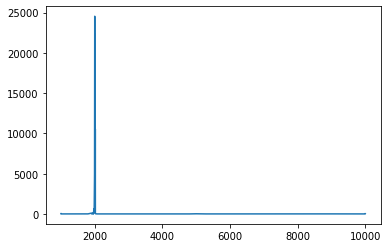

In [12]:
# initial_year_distribution = autos["registration_year"].value_counts().sort_index()
# initial_year_distribution.plot()

Plot the initial distribution which we will fit to the normal curve.

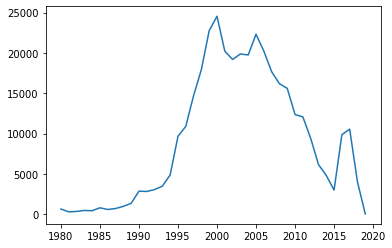

In [13]:
range_bool = autos["registration_year"].between(1980,2020)
final_distribution = autos[range_bool]
final_distribution["registration_year"].value_counts().sort_index().plot()

Cars aged between 1980 and 2021 create an appropriate bell curve distribution with a few interesting features.

In [18]:
autos["registration_year"] = final_distribution["registration_year"]

Finally, write the new distribution back to the main dataset.

### "price"

In [14]:
autos["price"].describe()

count    3.715280e+05
mean     1.729514e+04
std      3.587954e+06
min      0.000000e+00
25%      1.150000e+03
50%      2.950000e+03
75%      7.200000e+03
max      2.147484e+09
Name: price, dtype: float64

Confirm max and min values are outliers.

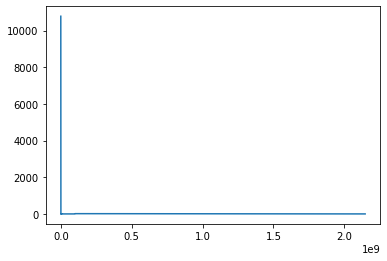

In [15]:
autos["price"].value_counts().sort_index().plot()

Plot the initial distribution we will crop to fit a normal distribution.

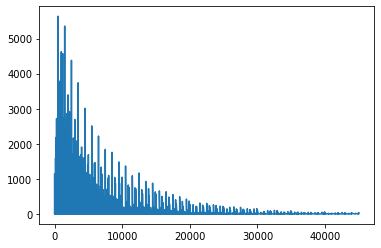

In [20]:
price_bool = autos["price"].between(1,45000)
final_price_distribution = autos[price_bool]
final_price_distribution["price"].value_counts().sort_index().plot()

Not sure this isn't charting properly.

In [23]:
autos["price"] = final_price_distribution["price"]

Write the new slice anyway

In [24]:
autos["price"].describe()

count    354977.000000
mean       5474.278449
std        6452.091505
min           1.000000
25%        1250.000000
50%        3000.000000
75%        7200.000000
max       45000.000000
Name: price, dtype: float64

Confirm we have a good distribution even if we can't chart it properly.

# Stage 3 Cleaning

## Date Columns
There are 5 columns that should represent date values. Some of these columns were created by the crawler, some came from the website itself. We can differentiate by referring to the data dictionary:

- `date_crawled`: added by the crawler : string
- `last_seen`: added by the crawler : string
- `ad_created`: from the website : string
- `registration_month`: from the website : int64
- `registration_year`: from the website : float


In [31]:
print(autos["date_crawled"].dtypes)
print(autos["last_seen"].dtypes)
print(autos["ad_created"].dtypes)
print(autos["registration_month"].dtypes)
print(autos["registration_year"].dtypes)

object
object
object
int64
float64


In [32]:
autos[['date_crawled','ad_created','last_seen']][0:5]

,date_crawled,ad_created,last_seen
0,2016-03-24 11:52:17,2016-03-24 00:00:00,2016-04-07 03:16:57
1,2016-03-24 10:58:45,2016-03-24 00:00:00,2016-04-07 01:46:50
2,2016-03-14 12:52:21,2016-03-14 00:00:00,2016-04-05 12:47:46
3,2016-03-17 16:54:04,2016-03-17 00:00:00,2016-03-17 17:40:17
4,2016-03-31 17:25:20,2016-03-31 00:00:00,2016-04-06 10:17:21


### "date_crawled"

In [48]:
print(autos['date_crawled'].str[:10].value_counts(dropna=False).sort_index())

2016-03-05     9493
2016-03-06     5373
2016-03-07    13260
2016-03-08    12429
2016-03-09    12710
2016-03-10    12098
2016-03-11    12159
2016-03-12    13447
2016-03-13     5846
2016-03-14    13477
2016-03-15    12428
2016-03-16    11201
2016-03-17    11763
2016-03-18     4877
2016-03-19    13112
2016-03-20    13506
2016-03-21    13278
2016-03-22    12063
2016-03-23    11878
2016-03-24    11113
2016-03-25    12236
2016-03-26    11876
2016-03-27    11248
2016-03-28    13045
2016-03-29    12695
2016-03-30    12457
2016-03-31    11846
2016-04-01    12675
2016-04-02    13033
2016-04-03    14391
2016-04-04    13974
2016-04-05     4764
2016-04-06     1175
2016-04-07      602
Name: date_crawled, dtype: int64


It is clear the crawl had quite a tight date range of 30 days.

Should cast as datetime.

In [90]:
autos['date_crawled'] = pd.to_datetime(autos['date_crawled'])
print(autos["date_crawled"].dtype)

datetime64[ns]


### "ad_created"

In [57]:
print(autos['ad_created'].str[:10].value_counts(dropna=False).sort_index())

2014-03-10        1
2015-03-20        1
2015-06-11        1
2015-06-18        1
2015-08-07        1
              ...  
2016-04-03    14450
2016-04-04    14022
2016-04-05     4330
2016-04-06     1172
2016-04-07      579
Name: ad_created, Length: 114, dtype: int64


"ad_created" has values outside the range of "date_crawled".

Investigate if these rows are valid.

In [70]:
bool_2015 = autos["ad_created"].str[:4] == "2015"
slice_2015 = autos[bool_2015]
slice_2015.head()

,date_crawled,name,price,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postcode,last_seen
4192,2016-03-23 14:42:46,Der_VAN_ist_zu_OSTERN_reisefertig,6000.0,test,bus,1995.0,automatik,200,andere,150000,0,benzin,chevrolet,nein,2015-03-20 00:00:00,24558,2016-04-07 03:45:01
5310,2016-03-23 01:48:59,Mercedes_Benz_C220_BT__7G_Tronic_AMG__Modellja...,NaN,test,limousine,2014.0,automatik,0,c_klasse,20000,2,diesel,mercedes_benz,NaN,2015-06-11 00:00:00,46145,2016-04-06 09:47:02
10471,2016-03-05 17:53:53,RENAULT_CLIO_1.6_EDITION_DYNAMIQUE,3490.0,test,limousine,2006.0,manuell,88,clio,150000,3,benzin,renault,nein,2015-11-02 00:00:00,40880,2016-03-17 15:46:57
31127,2016-03-28 13:31:25,Audi_A_3_Ambition,6950.0,test,limousine,2004.0,automatik,150,a3,100000,1,benzin,audi,nein,2015-12-06 00:00:00,61389,2016-04-06 14:16:09
63113,2016-03-05 20:42:38,W202_C280_V6__schmidt_felgen__amg__ATP_sport__...,5999.0,control,limousine,1997.0,automatik,197,c_klasse,150000,9,benzin,mercedes_benz,nein,2015-11-17 00:00:00,28816,2016-04-06 05:46:03


Appears to be adverts which have taken a long time to see and have valid rows in the set.

Cast as datetime.

In [91]:
autos['ad_created'] = pd.to_datetime(autos['ad_created'])
print(autos["ad_created"].dtype)

datetime64[ns]


### "last_seen"

In [53]:
print(autos['last_seen'].str[:10].value_counts(dropna=False).sort_index())

2016-03-05      480
2016-03-06     1536
2016-03-07     1955
2016-03-08     2993
2016-03-09     3713
2016-03-10     4296
2016-03-11     4847
2016-03-12     8694
2016-03-13     3154
2016-03-14     4570
2016-03-15     6097
2016-03-16     6100
2016-03-17    10685
2016-03-18     2575
2016-03-19     6061
2016-03-20     7399
2016-03-21     7481
2016-03-22     7656
2016-03-23     6743
2016-03-24     7147
2016-03-25     7095
2016-03-26     6004
2016-03-27     6282
2016-03-28     8275
2016-03-29     8661
2016-03-30     8863
2016-03-31     9005
2016-04-01     8925
2016-04-02     9294
2016-04-03     9424
2016-04-04     9531
2016-04-05    46889
2016-04-06    80930
2016-04-07    48168
Name: last_seen, dtype: int64


"last_seen" has exactly the same date range as "date_crawled" suggesting this was done as part of the crawl criteria.

Cast as datetime.

In [92]:
autos['last_seen'] = pd.to_datetime(autos['last_seen'])
print(autos["last_seen"].dtype)

datetime64[ns]


### "registration_month"

In [72]:
autos["registration_month"].describe()

count    371528.000000
mean          5.734445
std           3.712412
min           0.000000
25%           3.000000
50%           6.000000
75%           9.000000
max          12.000000
Name: registration_month, dtype: float64

A month value of "0" is not very helpful.

If this is the month of registration of the vehicle, it's hard to imagine any analysis would use this.

Drop "registration_month"

In [73]:
autos = autos.drop(columns=["registration_month"], axis=1)
autos.columns

Index(['date_crawled', 'name', 'price', 'ab_test', 'vehicle_type',
       'registration_year', 'gearbox', 'power_ps', 'model', 'odometer_km',
       'fuel_type', 'brand', 'unrepaired_damage', 'ad_created', 'postcode',
       'last_seen'],
      dtype='object')

# "brand" column aggregation

One fruitful area of analysis will be to look at brands and see if brand correlates to sales price, frequency and period on eBay.

To start, it's necessary to explore this series in more detail.

In [179]:
autos["brand"].value_counts(dropna=False, normalize=True).head(16)

volkswagen       0.214358
bmw              0.108401
opel             0.108030
mercedes_benz    0.095037
audi             0.088481
ford             0.068832
renault          0.048365
peugeot          0.029680
fiat             0.026044
seat             0.018900
mazda            0.015329
skoda            0.015183
smart            0.014128
citroen          0.013948
nissan           0.013558
toyota           0.012634
Name: brand, dtype: float64

The column series is very clean with no null values and no duplicates from spelling mistakes. Probably selected from a drop-down rather than manual entry by a user.

Many of the brands are rarely sold, making up less than 1% of listings.

"sonstige_autos" means "other cars" so we can eliminate that because it's vague.

Therefore, we will only aggregate the top 16 most frequently listed brands.

### Mean price aggregation

In [182]:
mean_price_agg = {}

top_17_index = autos["brand"].value_counts(dropna=False, normalize=True).head(16)
#print(top_17_index)

for brand in top_17_index.index:
  brand_slice = autos[autos["brand"] == brand]
  agg_mean = brand_slice["price"].mean()
  mean_price_agg[brand] = round(agg_mean)

print(mean_price_agg)

{'volkswagen': 5222, 'bmw': 8040, 'opel': 2912, 'mercedes_benz': 7855, 'audi': 8603, 'ford': 3486, 'renault': 2378, 'peugeot': 3220, 'fiat': 2769, 'seat': 4454, 'mazda': 4030, 'skoda': 6470, 'smart': 3545, 'citroen': 3575, 'nissan': 4601, 'toyota': 5194}


In [191]:
mean_price_df = pd.DataFrame.from_dict([mean_price_agg]).transpose()
mean_price_df = mean_price_df.sort_values(by=[0], ascending=False)
mean_price_df


,0
audi,8603
bmw,8040
mercedes_benz,7855
skoda,6470
volkswagen,5222
toyota,5194
nissan,4601
seat,4454
mazda,4030
citroen,3575


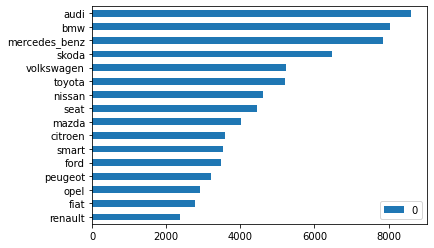

In [194]:
mean_price_df.sort_values(by=[0], ascending=True).plot.barh()

This aggregation shows what you would expect for vehicle depreciation.

German cars cost more, and hold their value much better than French cars.

Further aggregation analysis could look at:
- variation from a know vehicle average price to get a sense of depreciation.
- max and min prices agaist sales period.
- correlation between average mileage and price

### Average Kilometers Aggregation

This aggregation will use two methods:
- pandas series constructor
- pandas dataframe constructor